`cd project/seniorthesis/notebooks`

`conda list PyCO2SYS`

`pip install PyCO2SYS`

`pip install git+https://github.com/jbusecke/cmip6_preprocessing.git`

`mv *.png ../figures`

In [1]:
import xarray as xr
from cmip6_preprocessing.preprocessing import combined_preprocessing
import PyCO2SYS as pyco2 # i have to install this package through terminal for it to work
import intake
import matplotlib.pyplot as plt
import numpy as np
import warnings
import gsw
from cmip6_preprocessing.postprocessing import combine_datasets
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cmocean
import matplotlib.path as mpath
from cmip6_preprocessing.postprocessing import merge_variables

In [2]:
col = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [3]:
def pick_first_member(ds_list, **kwargs):
    return ds_list[0]

variables = ['dissic','talk', 'so', 'thetao']
z_kwargs = {'consolidated': True, 'use_cftime': True}
query = dict(experiment_id=['historical'], 
             table_id=['Omon'], 
             variable_id=variables,
             grid_label=['gr'],
              source_id=['GFDL-ESM4', 'CESM2-WACCM', 'CESM2', 
                         'CESM2-FV2', 'NorESM2-LM', 'MRI-ESM2-0', 
                         'GFDL-CM4', 'CESM2-WACCM-FV2']
            )


cat = col.search(**query)

# print(cat.df['source_id'].unique())
dset_dict_old = cat.to_dataset_dict(zarr_kwargs=z_kwargs, storage_options={'token': 'anon'},
                                preprocess=combined_preprocessing, aggregate=False)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [4]:
dd_new = merge_variables(dset_dict_old)

/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postprocessing.py:122: UserWarning: CMIP.NCAR.CESM2-WACCM-FV2.historical.r3i1p1f1.Omon.gr.none failed to combine with :indexes along dimension 'time' are not equal
  warnings.warn(f"{cmip6_dataset_id(ds)} failed to combine with :{e}")
/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postprocessing.py:122: UserWarning: CMIP.NCAR.CESM2-WACCM-FV2.historical.r2i1p1f1.Omon.gr.none failed to combine with :indexes along dimension 'time' are not equal
  warnings.warn(f"{cmip6_dataset_id(ds)} failed to combine with :{e}")
/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postprocessing.py:122: UserWarning: CMIP.NCAR.CESM2-FV2.historical.r3i1p1f1.Omon.gr.none failed to combine with :indexes along dimension 'time' are not equal
  warnings.warn(f"{cmip6_dataset_id(ds)} failed to combine with :{e}")
/srv/conda/envs/notebook/lib/python3.8/site-packages/cmip6_preprocessing/postproce

In [5]:
temp={}
for name,item in dd_new.items():
    #print(name)
    #print(item.data_vars)
    present = item.data_vars
    if all(i in present for i in variables):
        #print(name)
        temp[name]=item
dd_new = temp
list(dd_new.keys())

['NorESM2-LM.gr.historical.Omon.r1i1p1f1',
 'CESM2-WACCM.gr.historical.Omon.r2i1p1f1',
 'CESM2.gr.historical.Omon.r1i1p1f1',
 'MRI-ESM2-0.gr.historical.Omon.r1i2p1f1',
 'CESM2.gr.historical.Omon.r11i1p1f1',
 'CESM2-WACCM-FV2.gr.historical.Omon.r1i1p1f1',
 'CESM2.gr.historical.Omon.r4i1p1f1',
 'CESM2.gr.historical.Omon.r7i1p1f1',
 'CESM2.gr.historical.Omon.r5i1p1f1',
 'CESM2-WACCM.gr.historical.Omon.r1i1p1f1',
 'GFDL-CM4.gr.historical.Omon.r1i1p1f1',
 'CESM2.gr.historical.Omon.r6i1p1f1',
 'CESM2.gr.historical.Omon.r9i1p1f1',
 'CESM2.gr.historical.Omon.r2i1p1f1',
 'GFDL-ESM4.gr.historical.Omon.r1i1p1f1',
 'CESM2.gr.historical.Omon.r3i1p1f1',
 'CESM2.gr.historical.Omon.r8i1p1f1',
 'CESM2-WACCM.gr.historical.Omon.r3i1p1f1',
 'CESM2-FV2.gr.historical.Omon.r1i1p1f1']

In [6]:
dd_new_new = combine_datasets(
    dd_new,
    pick_first_member,
    match_attrs=['source_id', 'grid_label', 'experiment_id', 'table_id']
)
list(dd_new_new.keys())

['NorESM2-LM.gr.historical.Omon',
 'CESM2-WACCM.gr.historical.Omon',
 'CESM2.gr.historical.Omon',
 'MRI-ESM2-0.gr.historical.Omon',
 'CESM2-WACCM-FV2.gr.historical.Omon',
 'GFDL-CM4.gr.historical.Omon',
 'GFDL-ESM4.gr.historical.Omon',
 'CESM2-FV2.gr.historical.Omon']

## Not X-Slice
I selected a super random time

In [14]:
ds_2 = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=0)
ds_2

<xarray.Dataset>
Dimensions:        (bnds: 2, lev: 33, vertex: 4, x: 360, y: 180)
Coordinates: (12/14)
  * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
  * lev            (lev) float64 0.0 10.0 20.0 30.0 ... 4.5e+03 5e+03 5.5e+03
    lev_bounds     (lev, bnds) float64 dask.array<chunksize=(33, 2), meta=np.ndarray>
  * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    ...             ...
  * bnds           (bnds) int64 0 1
    lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
  * vertex         (vertex) int64 0 1 2 3
Data variables:
    thetao         (lev, y, x) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    so             (lev, y, x) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    dissic         (lev, y, x) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
    talk           (lev, y, x) float32 dask.array<chunksize=(33, 180, 360), meta=np.ndarray>
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1559
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    variant_info:           CMIP6 CESM2-FV2 historical experiment (1850-2014)...
    variant_label:          r1i1p1f1
    version_id:             v20191120
    intake_esm_varname:     None

In [17]:
#ds_2['pressure'] = xr.zeros_like(ds_2['thetao'])
temp = gsw.p_from_z(-1*ds_2['lev'], ds_2['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)*xr.ones_like(ds_2['x'])

In [18]:
temp

<xarray.DataArray (lev: 33, y: 180, x: 360)>
array([[[   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        , ...,
            0.        ,    0.        ,    0.        ]],

       [[  10.10878369,   10.10878369,   10.10878369, ...,
           10.10878369,   10.10878369,   10.10878369],
        [  10.10875107,   10.10875107,   10.10875107, ...,
           10.10875107,   10.10875107,   10.10875107],
        [  10.10868588,   10.10868588,   10.10868588, ...,
           10.10868588,   10.10868588,   10.10868588],
...
        [5114.51462097, 5114.51462097, 5114.51462097, ...,
         5114.51462097, 5114.51462097, 5114.51462097],
        [5114.54796467, 5114.54796467, 5114.54796467, ...,
         5114.54796467, 5114.54796467, 5114.54796467],
        [5114.56464682, 5114.56464682, 5114.56464682, ...,
         5114.56464682, 5114.56464682, 5114.56464682]],

       [[5632.44231346, 5632.44231346, 5632.44231346, ...,
         5632.44231346, 5632.44231346, 5632.44231346],
        [5632.42392403, 5632.42392403, 5632.42392403, ...,
         5632.42392403, 5632.42392403, 5632.42392403],
        [5632.38716786, 5632.38716786, 5632.38716786, ...,
         5632.38716786, 5632.38716786, 5632.38716786],
        ...,
        [5632.38716786, 5632.38716786, 5632.38716786, ...,
         5632.38716786, 5632.38716786, 5632.38716786],
        [5632.42392403, 5632.42392403, 5632.42392403, ...,
         5632.42392403, 5632.42392403, 5632.42392403],
        [5632.44231346, 5632.44231346, 5632.44231346, ...,
         5632.44231346, 5632.44231346, 5632.44231346]]])
Coordinates:
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1850-01-15 13:00:00
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [9]:
ds_2['thetainsitu'] = gsw.t_from_CT(ds_2['so'], ds_2['thetao'], ds_2['pressure']) 

In [10]:
conversion =  1e6/1035
results_2 = pyco2.sys(par1=ds_2['talk']*conversion,par2=ds_2['dissic']*conversion,par1_type=1,par2_type=2,
                    pressure_out=0, temperature_out = ds_2['thetao'], pressure = ds_2['pressure'], 
                    temperature = ds_2['thetainsitu'])

In [11]:
ds_2['pco2_out'] = ds_2['talk'].copy(data=results_2['pCO2_out'])

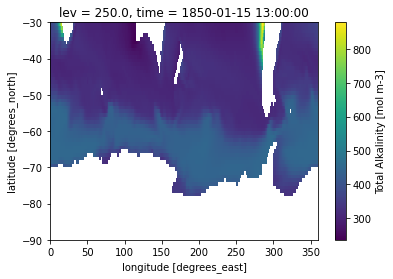

In [13]:
ds_2['pco2_out'].where(ds_2['lat']<-30,drop=True).isel(lev=10).plot()

#### At least in this version, it looks like `ds_2.so`, `ds_2.thetao`, `ds_2.dissic`, and `ds_2.talk` all have the same dimensions
But it still fails so maybe that's not the issue

In [16]:
ds_2

<xarray.Dataset>
Dimensions:        (bnds: 2, vertex: 4, x: 360, y: 180)
Coordinates: (12/14)
  * y              (y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bounds     (y, bnds, x) float64 dask.array<chunksize=(180, 2, 360), meta=np.ndarray>
    lev            float64 0.0
    lev_bounds     (bnds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * x              (x) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bounds     (x, bnds, y) float64 dask.array<chunksize=(360, 2, 180), meta=np.ndarray>
    ...             ...
  * bnds           (bnds) int64 0 1
    lon            (x, y) float64 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat            (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lon_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
    lat_verticies  (vertex, x, y) float64 dask.array<chunksize=(1, 360, 180), meta=np.ndarray>
  * vertex         (vertex) int64 0 1 2 3
Data variables:
    so             (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    thetao         (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    talk           (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    dissic         (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    pressure       (y, x) float32 dask.array<chunksize=(180, 360), meta=np.ndarray>
    thetainsitu    (y, x) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    pco2_out       (y, x) float64 nan nan nan nan ... 283.4 283.4 283.4 283.4
Attributes: (12/43)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  10950.0
    case_id:                1559
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    variant_info:           CMIP6 CESM2-FV2 historical experiment (1850-2014)...
    variant_label:          r1i1p1f1
    version_id:             v20191120
    intake_esm_varname:     None

In [15]:
ds_2.thetao

<xarray.DataArray 'thetao' (lev: 33, y: 180, x: 360)>
dask.array<getitem, shape=(33, 180, 360), dtype=float32, chunksize=(33, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Diagnostic should be contributed even for models using co...
    frequency:      mon
    id:             thetao
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Potential Temperature
    type:           real
    units:          degC
    variable_id:    thetao

In [16]:
ds_2.dissic

<xarray.DataArray 'dissic' (lev: 33, y: 180, x: 360)>
dask.array<getitem, shape=(33, 180, 360), dtype=float32, chunksize=(33, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    frequency:      mon
    id:             dissic
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Dissolved Inorganic Carbon Concentration
    type:           real
    units:          mol m-3
    variable_id:    dissic

In [17]:
ds_2.talk

<xarray.DataArray 'talk' (lev: 33, y: 180, x: 360)>
dask.array<getitem, shape=(33, 180, 360), dtype=float32, chunksize=(33, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    total alkalinity equivalent concentration (including carb...
    frequency:      mon
    id:             talk
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Total Alkalinity
    type:           real
    units:          mol m-3
    variable_id:    talk

Calculation for pressure

Looks pretty much identical to `p_1`

In [18]:
p_2 = gsw.p_from_z(-1*ds_2['lev'], ds_2['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)
p_2

<xarray.DataArray 'lev' (lev: 33, y: 180)>
array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  10.10878369,   10.10875107,   10.10868588, ...,   10.10868588,
          10.10875107,   10.10878369],
       [  20.21806351,   20.21799827,   20.21786787, ...,   20.21786787,
          20.21799827,   20.21806351],
       ...,
       [4597.82290111, 4597.80791945, 4597.77797463, ..., 4597.77797463,
        4597.80791945, 4597.82290111],
       [5114.56464682, 5114.54796467, 5114.51462097, ..., 5114.51462097,
        5114.54796467, 5114.56464682],
       [5632.44231346, 5632.42392403, 5632.38716786, ..., 5632.38716786,
        5632.42392403, 5632.44231346]])
Coordinates:
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In situ temp

Diff dimensions that `insitutemp_1` 

In [19]:
insitutemp_2 = gsw.t_from_CT(ds_2['so'], ds_2['thetao'], p_2) 
insitutemp_2

<xarray.DataArray 'so' (lev: 33, y: 180, x: 360)>
dask.array<t_from_ct, shape=(33, 180, 360), dtype=float64, chunksize=(33, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     object 1950-01-15 12:00:00
    lon      (x, y) float64 0.5 0.5 0.5 0.5 0.5 ... 359.5 359.5 359.5 359.5
    lat      (x, y) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Sea water salinity is the salt content of sea water, ofte...
    frequency:      mon
    id:             so
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Salinity
    type:           real
    units:          0.001
    variable_id:    so

In [20]:
conversion =  1e6/1035
results_2 = pyco2.sys(par1=ds_2.talk*conversion,par2=ds_2.dissic*conversion,par1_type=1,par2_type=2,
                    pressure_out=0, temperature_out = ds_2.thetao, pressure = p_2, 
                    temperature = insitutemp_2)
results_2

PyCO2SYS error: input shapes cannot be broadcast together.


AttributeError: 'NoneType' object has no attribute 'keys'

## X Slice

In [21]:
ds_1 = dd_new_new['CESM2-FV2.gr.historical.Omon'].isel(time=1200).sel(x=slice(180,200)).mean('x',keep_attrs=True)


In [22]:
ds_1.so

<xarray.DataArray 'so' (lev: 33, y: 180)>
dask.array<mean_agg-aggregate, shape=(33, 180), dtype=float32, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Sea water salinity is the salt content of sea water, ofte...
    frequency:      mon
    id:             so
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Salinity
    type:           real
    units:          0.001
    variable_id:    so

In [23]:
ds_1.thetao

<xarray.DataArray 'thetao' (lev: 33, y: 180)>
dask.array<mean_agg-aggregate, shape=(33, 180), dtype=float32, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Diagnostic should be contributed even for models using co...
    frequency:      mon
    id:             thetao
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Potential Temperature
    type:           real
    units:          degC
    variable_id:    thetao

In [24]:
ds_1.dissic

<xarray.DataArray 'dissic' (lev: 33, y: 180)>
dask.array<mean_agg-aggregate, shape=(33, 180), dtype=float32, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Dissolved inorganic carbon (CO3+HCO3+H2CO3) concentration
    frequency:      mon
    id:             dissic
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Dissolved Inorganic Carbon Concentration
    type:           real
    units:          mol m-3
    variable_id:    dissic

In [25]:
ds_1.talk

<xarray.DataArray 'talk' (lev: 33, y: 180)>
dask.array<mean_agg-aggregate, shape=(33, 180), dtype=float32, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    total alkalinity equivalent concentration (including carb...
    frequency:      mon
    id:             talk
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Total Alkalinity
    type:           real
    units:          mol m-3
    variable_id:    talk

In [26]:
p_1 = gsw.p_from_z(-1*ds_1['lev'], ds_1['y'], geo_strf_dyn_height=0, sea_surface_geopotential=0)
p_1

<xarray.DataArray 'lev' (lev: 33, y: 180)>
array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [  10.10878369,   10.10875107,   10.10868588, ...,   10.10868588,
          10.10875107,   10.10878369],
       [  20.21806351,   20.21799827,   20.21786787, ...,   20.21786787,
          20.21799827,   20.21806351],
       ...,
       [4597.82290111, 4597.80791945, 4597.77797463, ..., 4597.77797463,
        4597.80791945, 4597.82290111],
       [5114.56464682, 5114.54796467, 5114.51462097, ..., 5114.51462097,
        5114.54796467, 5114.56464682],
       [5632.44231346, 5632.42392403, 5632.38716786, ..., 5632.38716786,
        5632.42392403, 5632.44231346]])
Coordinates:
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [27]:
insitutemp_1 = gsw.t_from_CT(ds_1['so'], ds_1['thetao'], p_1) 
insitutemp_1

<xarray.DataArray 'so' (lev: 33, y: 180)>
dask.array<t_from_ct, shape=(33, 180), dtype=float64, chunksize=(33, 180), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    Sea water salinity is the salt content of sea water, ofte...
    frequency:      mon
    id:             so
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Water Salinity
    type:           real
    units:          0.001
    variable_id:    so

In [28]:
conversion =  1e6/1035
results_1 = pyco2.sys(par1=ds_1.talk*conversion,par2=ds_1.dissic*conversion,par1_type=1,par2_type=2,
                    pressure_out=0, temperature_out = ds_1.thetao, pressure = p_1, 
                    temperature = insitutemp_1)
results_1

{'par1': array([[          nan,           nan,           nan, ..., 2126.87329102,
         2127.9831543 , 2129.75488281],
        [          nan,           nan,           nan, ..., 2126.87329102,
         2127.98339844, 2129.75537109],
        [          nan,           nan,           nan, ..., 2126.87475586,
         2127.98535156, 2129.75805664],
        ...,
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan]]),
 'par1_type': array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 'par2': array([[          nan,           nan,           nan, ..., 

In [29]:
print(ds_1['talk'].copy(data=results_1['pCO2_out']))

<xarray.DataArray 'talk' (lev: 33, y: 180)>
array([[         nan,          nan,          nan, ..., 309.44352178,
        309.50128487, 309.3143347 ],
       [         nan,          nan,          nan, ..., 309.44460043,
        309.50219954, 309.31686714],
       [         nan,          nan,          nan, ..., 309.44678642,
        309.50517289, 309.31860388],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Coordinates:
  * y        (y) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 0.0 10.0 20.0 30.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
    time     object 1950-01-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area